In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

plt.style.use("ggplot")

%matplotlib inline

In [190]:
plt.rcParams["figure.figsize"] = (12, 6)

In [191]:
dataset = pd.read_csv('NVDA_historical_data.csv', index_col='Date', parse_dates=True)

In [192]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-10-22,2018-10-22,57.820000,58.830002,56.767502,57.805000,57.303711,36884400
2018-10-23,2018-10-23,55.107498,56.047501,54.177502,55.264999,54.785740,62643600
2018-10-24,2018-10-24,54.877499,55.347500,49.712502,49.852501,49.420181,88428800
2018-10-25,2018-10-25,48.867500,52.437500,48.419998,51.959999,51.509396,95172000
2018-10-26,2018-10-26,49.577499,51.209999,48.279999,49.572498,49.142605,66478400


In [193]:
# Data cleaning
#Data Cleaning
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [194]:
# Check the shape of the data 
df.shape

(1008, 7)

In [195]:
df.index

DatetimeIndex(['2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25',
               '2018-10-26', '2018-10-29', '2018-10-30', '2018-10-31',
               '2018-11-01', '2018-11-02',
               ...
               '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13',
               '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='Date', length=1008, freq=None)

<Axes: xlabel='Date'>

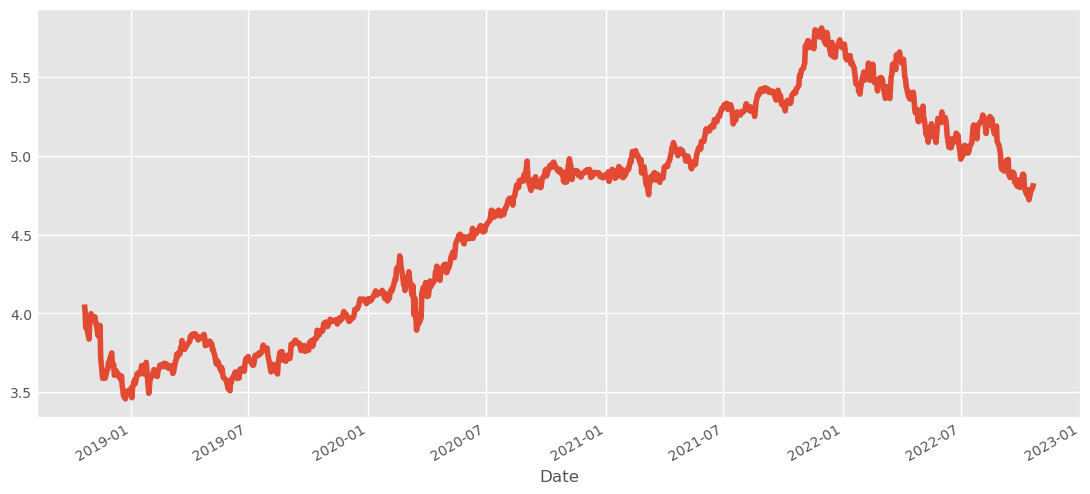

In [196]:
y = np.log(df["Close"])
y.plot()

In [197]:
y.index

DatetimeIndex(['2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25',
               '2018-10-26', '2018-10-29', '2018-10-30', '2018-10-31',
               '2018-11-01', '2018-11-02',
               ...
               '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13',
               '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='Date', length=1008, freq=None)

In [198]:
list(y.index[:10])

[Timestamp('2018-10-22 00:00:00'),
 Timestamp('2018-10-23 00:00:00'),
 Timestamp('2018-10-24 00:00:00'),
 Timestamp('2018-10-25 00:00:00'),
 Timestamp('2018-10-26 00:00:00'),
 Timestamp('2018-10-29 00:00:00'),
 Timestamp('2018-10-30 00:00:00'),
 Timestamp('2018-10-31 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-11-02 00:00:00')]

In [199]:
y.asfreq("D")[:15]

Date
2018-10-22    4.057075
2018-10-23    4.012140
2018-10-24    3.909069
2018-10-25    3.950474
2018-10-26    3.903436
2018-10-27         NaN
2018-10-28         NaN
2018-10-29    3.837407
2018-10-30    3.926912
2018-10-31    3.964758
2018-11-01    3.998705
2018-11-02    3.983972
2018-11-03         NaN
2018-11-04         NaN
2018-11-05    3.969206
Freq: D, Name: Close, dtype: float64

In [200]:
y.asfreq("D", method="ffill")[:15]

Date
2018-10-22    4.057075
2018-10-23    4.012140
2018-10-24    3.909069
2018-10-25    3.950474
2018-10-26    3.903436
2018-10-27    3.903436
2018-10-28    3.903436
2018-10-29    3.837407
2018-10-30    3.926912
2018-10-31    3.964758
2018-11-01    3.998705
2018-11-02    3.983972
2018-11-03    3.983972
2018-11-04    3.983972
2018-11-05    3.969206
Freq: D, Name: Close, dtype: float64

In [201]:
pd.DataFrame(dict(low=y.resample("Q").min(), 
                  high=y.resample("Q").max(), 
                  first = y.resample("Q").first(), 
                  last = y.resample("Q").last(),
                  median = y.resample("Q").median(),
                  mean = y.resample("Q").mean()
                 ))

,low,high,first,last,median,mean
Date,,,,,,
2018-12-31,3.458522,4.057075,4.057075,3.507807,3.675188,3.737112
2019-03-31,3.465658,3.828315,3.527977,3.804215,3.652345,3.655454
2019-06-30,3.509902,3.871722,3.819250,3.714973,3.701549,3.717923
2019-09-30,3.616107,3.830433,3.726717,3.773163,3.741116,3.737731
2019-12-31,3.767228,4.091716,3.772761,4.074567,3.954388,3.948183
2020-03-31,3.893859,4.365325,4.093970,4.188138,4.133944,4.140423
2020-06-30,4.107055,4.556689,4.107055,4.553640,4.441121,4.385062
2020-09-30,4.557030,4.966091,4.557030,4.907531,4.765349,4.751197
2020-12-31,4.831030,4.981000,4.913721,4.871756,4.896009,4.896496


In [202]:
period = 3
y_rolling = pd.DataFrame(dict(actual = y, 
                              rolling_mean = y.rolling(period).mean(), 
                              ewm = y.ewm(span = period).mean()
                             ))
y_rolling.head(10)

,actual,rolling_mean,ewm
Date,,,
2018-10-22,4.057075,NaN,4.057075
2018-10-23,4.012140,NaN,4.027118
2018-10-24,3.909069,3.992761,3.959661
2018-10-25,3.950474,3.957228,3.954762
2018-10-26,3.903436,3.920993,3.928271
2018-10-29,3.837407,3.897106,3.882118
2018-10-30,3.926912,3.889252,3.904691
2018-10-31,3.964758,3.909692,3.934842
2018-11-01,3.998705,3.963458,3.966836


In [203]:
rolling_dropped = y_rolling.dropna()
print("rmse over rolling mean: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped.rolling_mean) ** 0.5)
print("rmse over ewma: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped["ewm"]) ** 0.5)

rmse over rolling mean:  0.02440938619099357
rmse over ewma:  0.018867493266021454


<Axes: xlabel='Date'>

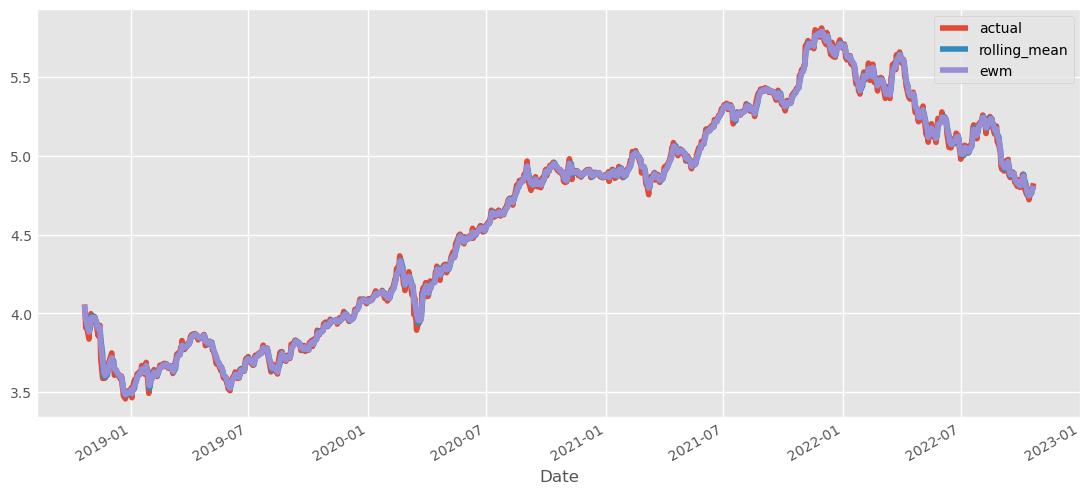

In [204]:
y_rolling.plot()
# By visual inspection, know that the time series is not stationary

In [205]:
# Since the p-value of the Dickey Fullter Test is > 0.05, there is not sufficient proof that the time series is stationary
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.028859
p-value: 0.742594


In [206]:
# to further transform the data to make it stationary, take difference 
diff = pd.DataFrame({"actual": y, "diff1": y.diff(3)}).head(10)
diff["diff2"] = diff.diff1.diff(1)
diff

,actual,diff1,diff2
Date,,,
2018-10-22,4.057075,NaN,NaN
2018-10-23,4.012140,NaN,NaN
2018-10-24,3.909069,NaN,NaN
2018-10-25,3.950474,-0.106601,NaN
2018-10-26,3.903436,-0.108704,-0.002102
2018-10-29,3.837407,-0.071661,0.037042
2018-10-30,3.926912,-0.023563,0.048099
2018-10-31,3.964758,0.061322,0.084884
2018-11-01,3.998705,0.161298,0.099976


In [207]:
# Taking difference by lag 1, observe that the p-value for the Dickey Fuller Test p < 0.05
# Conclude that diff 1 has made the data stationary
result = adfuller(y.diff(periods=1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.106136
p-value: 0.000000


<Axes: xlabel='Date'>

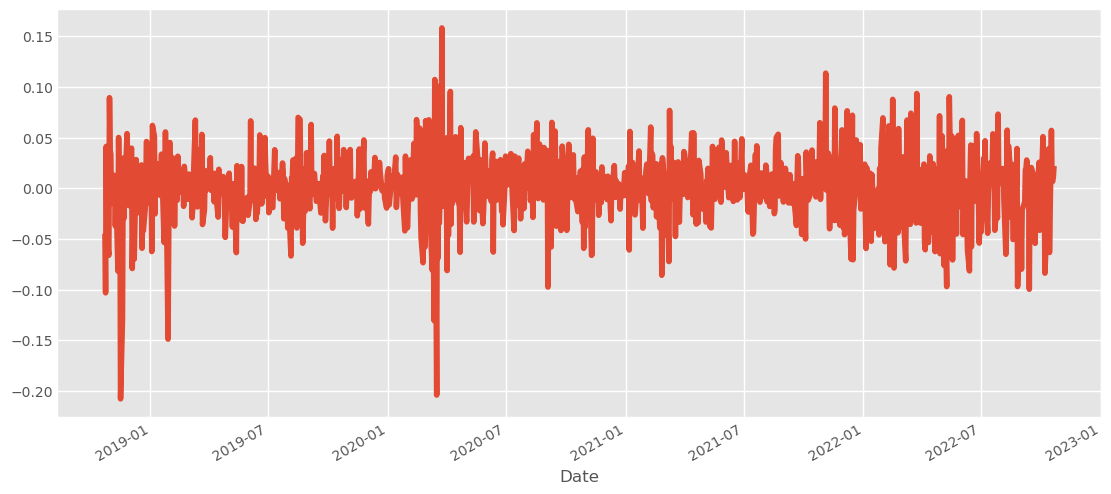

In [208]:
y.diff(periods=1).plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

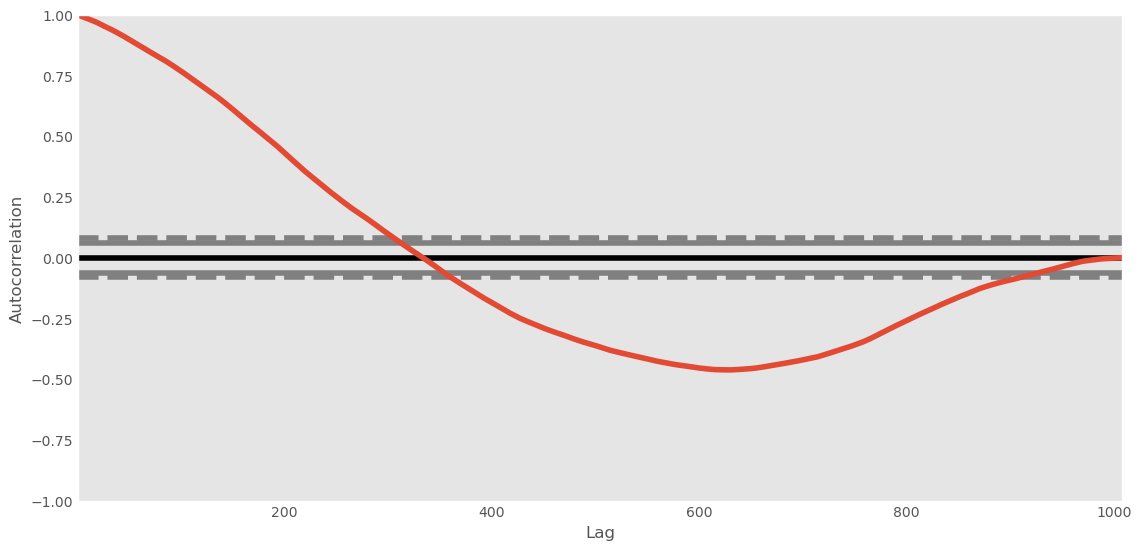

In [209]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

In [210]:
y = y.dropna()

                 0
count  1008.000000
mean      0.004822
std       0.132174
min      -0.204711
25%      -0.015505
50%       0.002525
75%       0.019093
max       4.057075


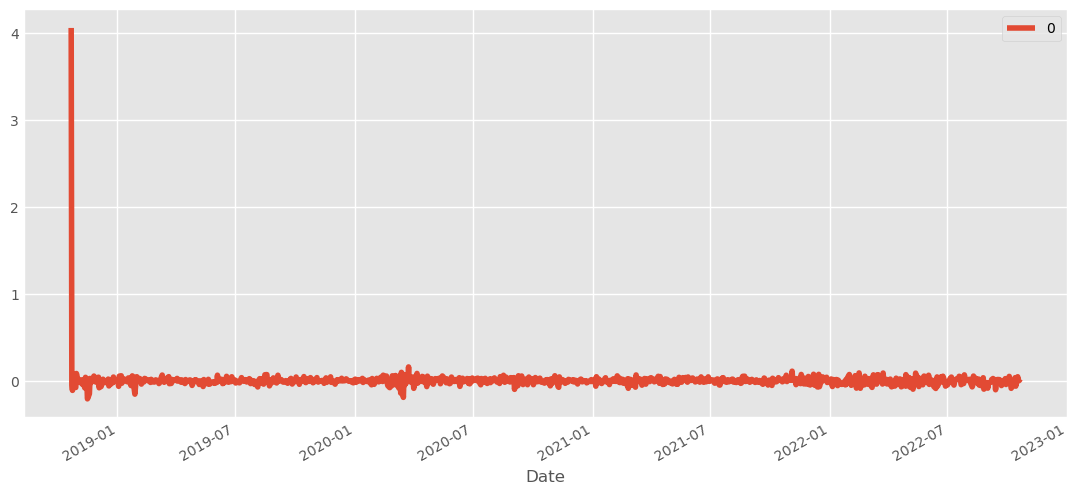

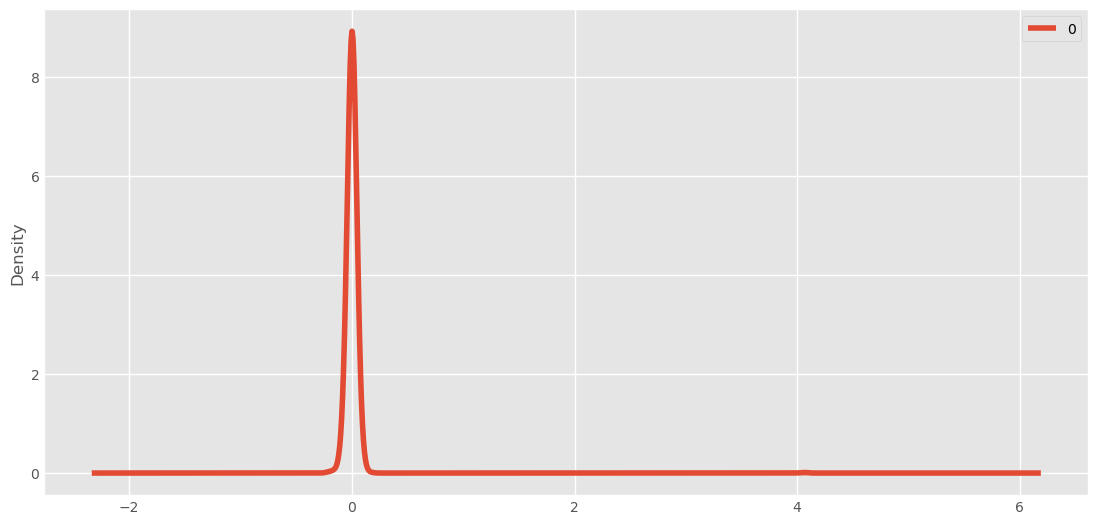

In [360]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(y, order=(2, 1, 2)) # p, d, q
model_fit = model.fit()
#print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [361]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1008
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1979.753
Date:                Mon, 23 Oct 2023   AIC                          -3949.506
Time:                        00:10:17   BIC                          -3924.933
Sample:                             0   HQIC                         -3940.170
                               - 1008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7586      0.946     -0.801      0.423      -2.614       1.097
ar.L2         -0.2679      0.489     -0.548      0.584      -1.226       0.690
ma.L1          0.6718      0.941      0.714      0.475      -1.173       2.516
ma.L2          0.2646      0.406      0.652      0.515      -0.531       1.060
sigma2         0.0011   3.22e-05     35.614      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               584.51
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.58
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [310]:
model.endog

array([[4.05707528],
       [4.01213978],
       [3.90906867],
       ...,
       [4.79173275],
       [4.80352914],
       [4.82559006]])

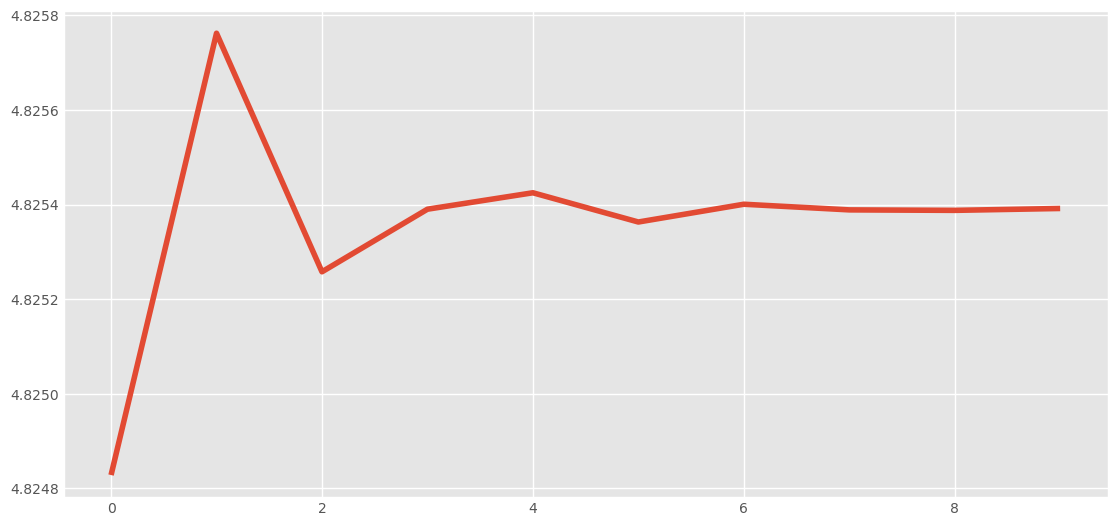

In [342]:
model = ARIMA(y.values, order=(2, 1, 2))
model_fit = model.fit()
forecast = model_fit.forecast(201)
forecast = pd.DataFrame(forecast, columns=['Predictions'])
plt.plot(predictions)

In [343]:
predictions[:10]

array([4.82482843, 4.82576207, 4.82525792, 4.82539019, 4.82542493,
       4.82536314, 4.8254007 , 4.82538876, 4.82538776, 4.82539172])

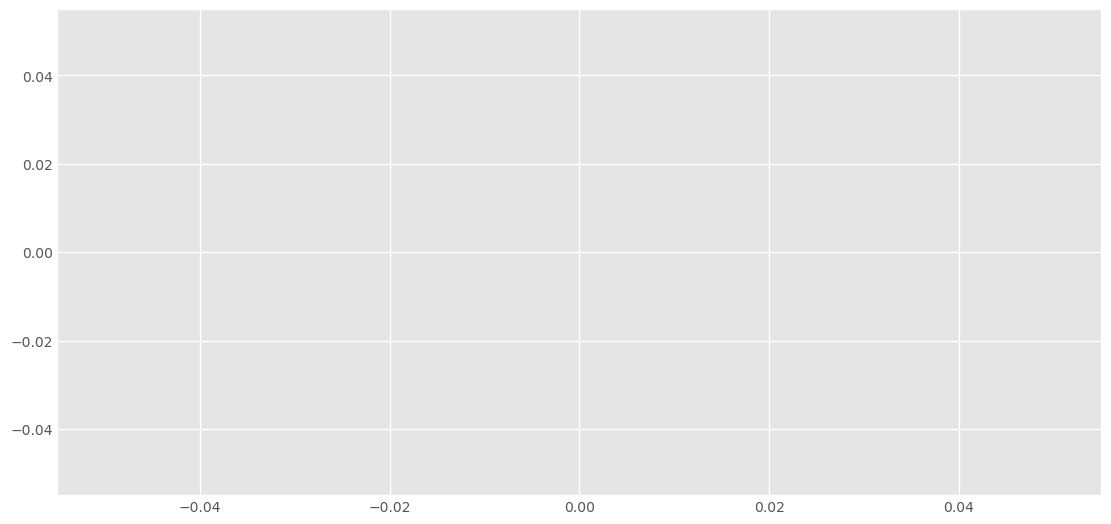

In [359]:
from sklearn.metrics import mean_squared_error

x = y.values
train_size = int(len(x) * 0.8)
train, test = x[0:807], x[807:]
history = [x for x in train]
predictions = []


plt.plot(predictions, color='red')

In [358]:
result = pd.DataFrame(y)[807:]
result.columns = ["actual"]
result = predictions
result

[]